### Linear Regression of Advertising Data
Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspapers for advertising.

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable.

In [10]:
# Using linear regression to model sales based on real-world advertising data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

data_path = "advertising_data.csv"
data = pd.read_csv(data_path, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


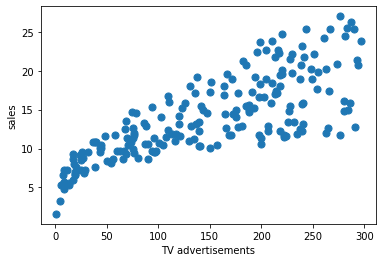

In [11]:
# scatter plot of TV advertisement data in relation to sales
plt.scatter(data.TV, data.sales, s=50)
plt.xlabel('TV advertisements')
plt.ylabel('sales')
plt.show()

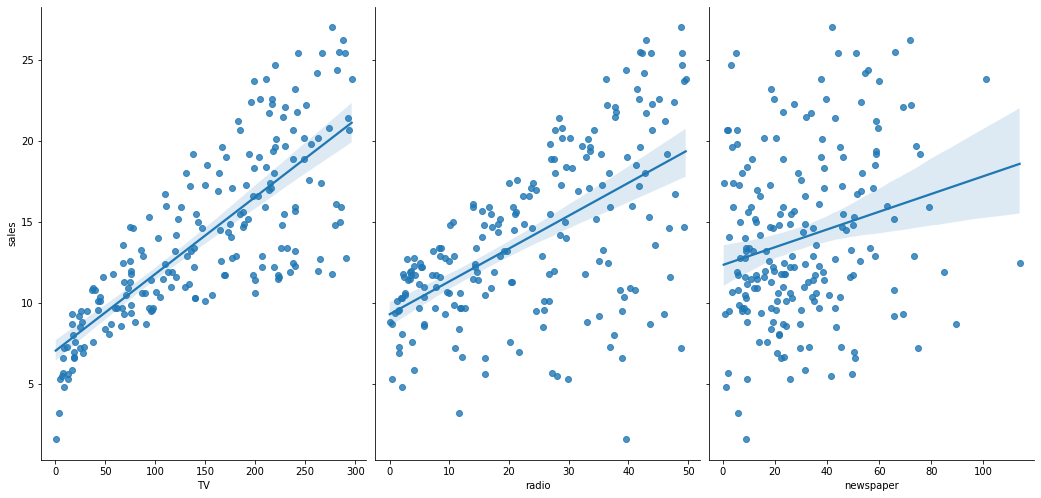

In [12]:
import seaborn as sns

# create a Python list of feature names
feature_names = ['TV', 'radio', 'newspaper']

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=feature_names, y_vars='sales', height=7, aspect=0.7, kind='reg')

### Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)

In [13]:
# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.sales

# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [14]:
# Linear Regression Model
model = LinearRegression()

# fit the model to the training data (learn the coefficients)
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# print the intercept and coefficients
print("intercept = ", model.intercept_)
print("coefficients = ")

# pair the feature names with the coefficients
list(zip(feature_names, model.coef_))

intercept =  2.8769666223179318
coefficients = 


[('TV', 0.046564567874150295),
 ('radio', 0.1791581224508883),
 ('newspaper', 0.0034504647111804065)]

The Learned Linear Function is:
$$y = 2.88 + 0.0466 * TV + 0.179 * Radio + 0.00345 * Newspaper$$

### Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [15]:
# compute the root mean square error (RMSE) of our predictions
err = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", err)

RMSE =  1.404651423032896


### Experiment: Feature selection
Does Newspaper it improve the quality of our predictions?

**Hypothesis:** Newspaper does not improve model predictions

**Testing:** Let's remove it from the model and check the RMSE..